# Load libraries

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Load dataset

In [2]:
df = pd.read_csv(r'C:\Users\Rachna\Desktop\Datasets\Descriptive_Analytics_Banking_Data18MAY.csv',delimiter = ';')

In [3]:
df.head()

,Month,CLIENTNUM,wealth_tag,card_type,Revlv_ind,spend_category,Trans_amt,trans_cnt
0,1301,9124400,High Net Worth,Blue,Transactor,Grocery,76.40,9
1,1301,9124400,High Net Worth,Blue,Transactor,Auto,55.48,6
2,1301,5782042,High Net Worth,Blue,Transactor,Airlines,79.16,8
3,1301,5782042,High Net Worth,Blue,Transactor,Grocery,78.87,8
4,1301,5782042,High Net Worth,Blue,Transactor,Auto,58.00,6


In [4]:
df.shape

(8052, 8)

# Data Cleaning:

## Checking null values

In [5]:
df.isnull().sum()

Month             0
CLIENTNUM         0
wealth_tag        0
card_type         0
Revlv_ind         0
spend_category    0
Trans_amt         4
trans_cnt         0
dtype: int64

## Filling missing values

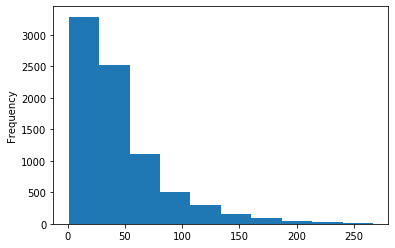

In [6]:
df['Trans_amt'].plot.hist()

In [7]:
df['Trans_amt'].fillna(df['Trans_amt'].median(), inplace = True)

In [8]:
df.isnull().sum()

Month             0
CLIENTNUM         0
wealth_tag        0
card_type         0
Revlv_ind         0
spend_category    0
Trans_amt         0
trans_cnt         0
dtype: int64

* Here , all missing values are filled.

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8052 entries, 0 to 8051
Data columns (total 8 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Month           8052 non-null   int64  
 1   CLIENTNUM       8052 non-null   int64  
 2   wealth_tag      8052 non-null   object 
 3   card_type       8052 non-null   object 
 4   Revlv_ind       8052 non-null   object 
 5   spend_category  8052 non-null   object 
 6   Trans_amt       8052 non-null   float64
 7   trans_cnt       8052 non-null   int64  
dtypes: float64(1), int64(3), object(4)
memory usage: 503.4+ KB


In [10]:
from sklearn.preprocessing import LabelEncoder

In [11]:
le = LabelEncoder()
df['spend_category'] = le.fit_transform(df['spend_category'])
df['spend_category'].head()

0    4
1    1
2    0
3    4
4    1
Name: spend_category, dtype: int32

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8052 entries, 0 to 8051
Data columns (total 8 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Month           8052 non-null   int64  
 1   CLIENTNUM       8052 non-null   int64  
 2   wealth_tag      8052 non-null   object 
 3   card_type       8052 non-null   object 
 4   Revlv_ind       8052 non-null   object 
 5   spend_category  8052 non-null   int32  
 6   Trans_amt       8052 non-null   float64
 7   trans_cnt       8052 non-null   int64  
dtypes: float64(1), int32(1), int64(3), object(3)
memory usage: 471.9+ KB


# Draw Graphs

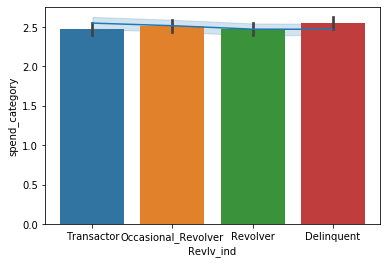

In [13]:
sns.barplot(df['Revlv_ind'] , df['spend_category'])
sns.lineplot(df['Revlv_ind'] , df['spend_category'])
plt.show()

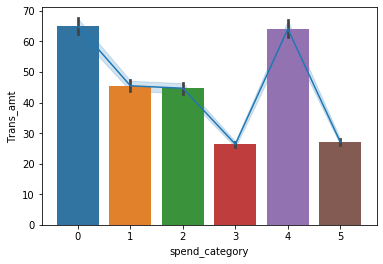

In [14]:
sns.barplot(df['spend_category'] , df['Trans_amt'])
sns.lineplot(df['spend_category'] , df['Trans_amt'])
plt.show()

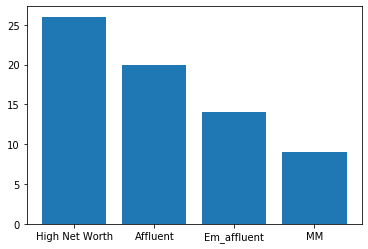

In [15]:
plt.bar(df['wealth_tag'] , df['trans_cnt'])
plt.show()

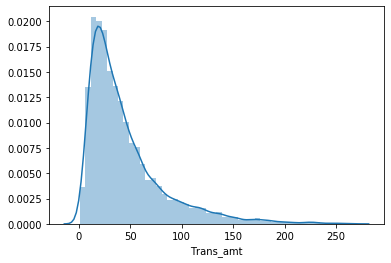

In [16]:

sns.distplot(df['Trans_amt'])

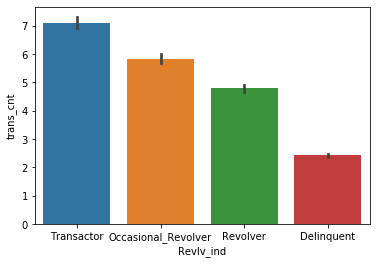

In [17]:
 sns.barplot(df["Revlv_ind"], df["trans_cnt"])

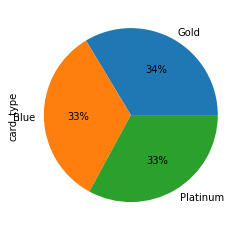

In [18]:
df['card_type'].value_counts().plot(kind = 'pie',autopct = '%1.0f%%')

In [19]:
pd.crosstab(df.Month , df.card_type)

card_type,Blue,Gold,Platinum
Month,,,
1301,451,439,445
1302,441,450,438
1303,450,457,451
1304,444,432,431
1305,456,462,429
1306,454,467,455


In [20]:
pd.crosstab(df.Month , df.card_type)

card_type,Blue,Gold,Platinum
Month,,,
1301,451,439,445
1302,441,450,438
1303,450,457,451
1304,444,432,431
1305,456,462,429
1306,454,467,455


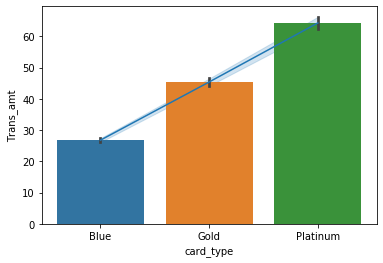

In [21]:
sns.barplot(df['card_type'], df['Trans_amt'])
sns.lineplot(df['card_type'] , df['Trans_amt'])

# Inference :

Customers with platinum card had done the maximum amount of transactions & customerwith blue card had done minimum amount of transactions

#  Platinum Card customer analysis

In [22]:
platinum_card = df[df['card_type'] == 'Platinum']
platinum_card.head()

,Month,CLIENTNUM,wealth_tag,card_type,Revlv_ind,spend_category,Trans_amt,trans_cnt
228,1301,5233857,High Net Worth,Platinum,Transactor,3,74.66,8
229,1301,5233857,High Net Worth,Platinum,Transactor,5,74.00,8
230,1301,4253063,High Net Worth,Platinum,Transactor,4,221.97,23
231,1301,4253063,High Net Worth,Platinum,Transactor,1,151.94,16
232,1301,4253063,High Net Worth,Platinum,Transactor,0,232.78,22


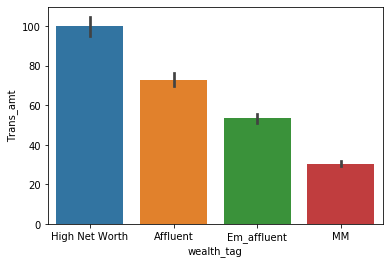

In [23]:
sns.barplot(platinum_card['wealth_tag'],platinum_card['Trans_amt'])

# Gold card customer analysis

In [24]:
Gold_card = df[df['card_type'] =='Gold']
Gold_card.head()

,Month,CLIENTNUM,wealth_tag,card_type,Revlv_ind,spend_category,Trans_amt,trans_cnt
114,1301,4215796,High Net Worth,Gold,Transactor,0,148.64,16
115,1301,4215796,High Net Worth,Gold,Transactor,4,148.00,16
116,1301,4215796,High Net Worth,Gold,Transactor,3,53.46,6
117,1301,4215796,High Net Worth,Gold,Transactor,1,97.09,10
118,1301,7780233,High Net Worth,Gold,Transactor,5,59.62,6


# Blue card customer analysis

In [25]:
Blue_card = df[df['card_type'] == 'Blue']
Blue_card.head()

,Month,CLIENTNUM,wealth_tag,card_type,Revlv_ind,spend_category,Trans_amt,trans_cnt
0,1301,9124400,High Net Worth,Blue,Transactor,4,76.40,9
1,1301,9124400,High Net Worth,Blue,Transactor,1,55.48,6
2,1301,5782042,High Net Worth,Blue,Transactor,0,79.16,8
3,1301,5782042,High Net Worth,Blue,Transactor,4,78.87,8
4,1301,5782042,High Net Worth,Blue,Transactor,1,58.00,6


# Standard daviation

In [26]:
np.std(df[['Trans_amt','trans_cnt','Month', 'CLIENTNUM' , 'spend_category']])

Trans_amt         3.801611e+01
trans_cnt         3.810159e+00
Month             1.713077e+00
CLIENTNUM         2.792124e+06
spend_category    1.705714e+00
dtype: float64

# Variance

In [27]:
np.var(df[['Trans_amt','trans_cnt','Month', 'CLIENTNUM' , 'spend_category']])

Trans_amt         1.445225e+03
trans_cnt         1.451731e+01
Month             2.934632e+00
CLIENTNUM         7.795956e+12
spend_category    2.909460e+00
dtype: float64

# Skewness

In [28]:
df[['spend_category' , 'Month' , 'CLIENTNUM' , 'Trans_amt' , 'trans_cnt']].skew()

spend_category   -0.002569
Month            -0.005451
CLIENTNUM        -0.015012
Trans_amt         1.917313
trans_cnt         1.874800
dtype: float64

# Range

In [29]:
col = ['spend_category','trans_cnt','Month', 'CLIENTNUM' , 'spend_category']
for i in col:
    range_ = max(df[i])-min(df[i])
    print(f"Range of {i} is {range_}")


Range of spend_category is 5
Range of trans_cnt is 25
Range of Month is 5
Range of CLIENTNUM is 9996085
Range of spend_category is 5


# Correlation

In [30]:
df.corr()

,Month,CLIENTNUM,spend_category,Trans_amt,trans_cnt
Month,1.000000,-0.000532,0.004879,0.022074,0.024132
CLIENTNUM,-0.000532,1.000000,-0.014045,-0.062280,-0.058197
spend_category,0.004879,-0.014045,1.000000,-0.195350,-0.194414
Trans_amt,0.022074,-0.062280,-0.195350,1.000000,0.972036
trans_cnt,0.024132,-0.058197,-0.194414,0.972036,1.000000


In [31]:
df[['spend_category' , 'Month' , 'CLIENTNUM' , 'Trans_amt' , 'trans_cnt']].mean()

spend_category    2.501987e+00
Month             1.303513e+03
CLIENTNUM         5.048122e+06
Trans_amt         4.540004e+01
trans_cnt         5.045455e+00
dtype: float64

In [32]:
df[['spend_category' , 'Month' , 'CLIENTNUM' , 'Trans_amt' , 'trans_cnt']].median()

spend_category          3.000
Month                1304.000
CLIENTNUM         5138360.000
Trans_amt              33.705
trans_cnt               4.000
dtype: float64

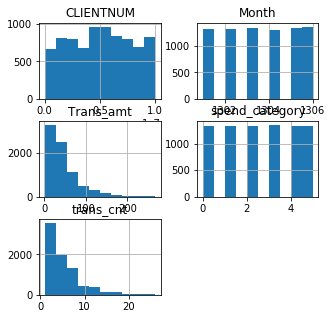

In [33]:
df.hist(figsize=(5,5))
plt.show()